<a href="https://colab.research.google.com/github/fatemehes75/Regression/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Polynomial Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
#Copy dataset in a dataframe
df = pd.read_csv("FuelConsumption.csv")
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [3]:
#select few features 
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


In [4]:
#Split tarin and test
msk = np.random.rand(len(df)) < 0.8 # creating mask
print(msk)
print(~msk)
train = cdf[msk]
test = cdf[~msk]

[ True  True False ...  True  True  True]
[False False  True ... False False False]


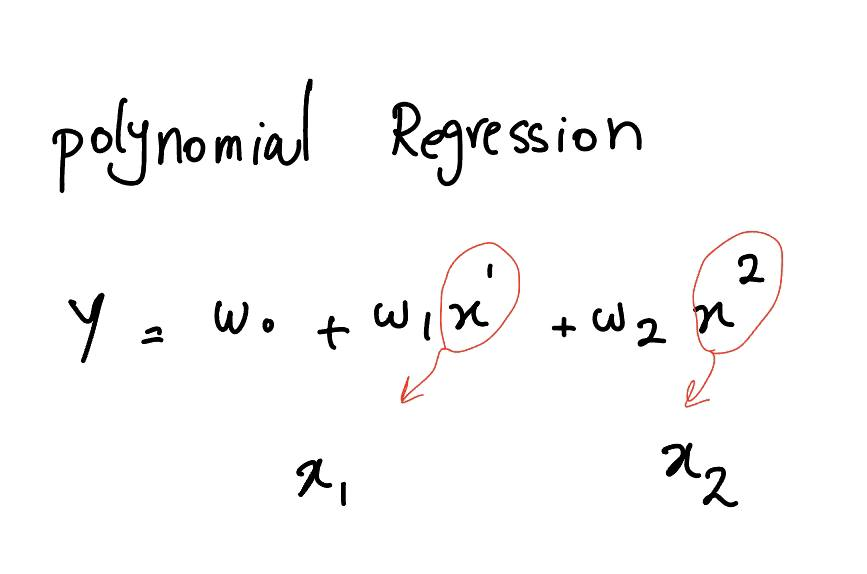

In [5]:
#Polynomial Regression Model
#predict CO2EMISSIONS(y) from ENGINESIZE(x)
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
x_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train)
regressor = linear_model.LinearRegression()
regressor.fit(x_poly, y_train)

LinearRegression()

In [6]:
# The coefficients
print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)

Coefficients:  [[ 0.         53.05596099 -1.8549385 ]]
Intercept:  [102.37970955]


Text(0, 0.5, 'CO2EMISSIONS')

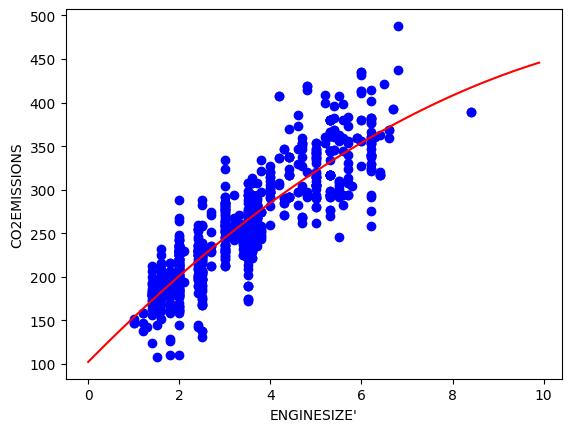

In [7]:
#Plot the output
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
x_1 = np.arange(0.0, 10.0, 0.1)
y_1 = regressor.intercept_[0]+ regressor.coef_[0][1]*x_1+ regressor.coef_[0][2]*np.power(x_1, 2) # y = w1*x + W2* x^2
plt.plot(x_1, y_1, '-r' )
plt.xlabel("ENGINESIZE'")
plt.ylabel("CO2EMISSIONS")

In [8]:
#Evaluation 

x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

from sklearn.metrics import r2_score
x_poly_test = poly_reg.fit_transform(x_test)
Predicted_y = regressor.predict(x_poly_test)
abs_error = Predicted_y - y_test
print("absolute error: %.3f" % np.mean(np.absolute(abs_error)))
print("Residual sum of squares (MSE): %.3f" % np.mean((abs_error) ** 2))
print("R2-score: %.3f" % r2_score(y_test,Predicted_y ) )

absolute error: 23.598
Residual sum of squares (MSE): 954.040
R2-score: 0.737
